In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.layers import Embedding, Reshape, Merge, Dropout, Dense
from keras.layers import Input, Embedding, LSTM, Lambda
from keras.models import Model
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
import keras.backend as K



## This first dataset was generated without 'chunking', meaning that patterns that otherwise might be easy to observe with a dataset consisting of contigs of proportional length could be obscured. Let's see how well we can do anyway.

In [2]:
contig_labels = np.load('/home/jacob/Documents/Corals/contig_labels.npy')
pentamer = np.load('/home/jacob/Documents/Corals/pentamer.npy')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(pentamer, contig_labels, test_size = 0.25, random_state=420)

In [13]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=1024))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [17]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping('val_loss', patience=4)]

In [39]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
RMSprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])

y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

#history = model.fit(X_train, y_binary_train,
#          epochs=100,
#          batch_size=128, validation_split=.1)
#score = model.evaluate(X_test, y_binary_test, batch_size=128)

In [11]:
score

[1.2355958243990455, 0.8894549162789868]

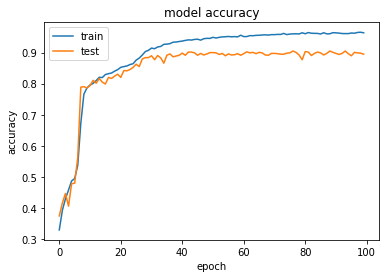

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
new_model = Sequential()
new_model.add(Dense(1024, activation='relu', input_dim=1024))
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(56, activation='tanh'))
new_model.add(Dropout(0.25))
new_model.add(Dense(10, activation='softmax'))

new_model.compile(loss='mse',
              optimizer=RMSprop,
              metrics=['accuracy'])
new_history = new_model.fit(X_train, y_binary_train,
          epochs=100,
          batch_size=128, validation_split=.1)
score = new_model.evaluate(X_test, y_binary_test, batch_size=128)

Train on 10597 samples, validate on 1178 samples
Epoch 1/100
10597/10597 [==============================] - 1s 94us/step - loss: 0.0688 - acc: 0.4028 - val_loss: 0.0456 - val_acc: 0.5917
Epoch 2/100
10597/10597 [==============================] - 1s 51us/step - loss: 0.0463 - acc: 0.6268 - val_loss: 0.0400 - val_acc: 0.6732
Epoch 3/100
10597/10597 [==============================] - 1s 51us/step - loss: 0.0421 - acc: 0.6636 - val_loss: 0.0403 - val_acc: 0.6952
Epoch 4/100
10597/10597 [==============================] - 1s 48us/step - loss: 0.0391 - acc: 0.6900 - val_loss: 0.0424 - val_acc: 0.6783
Epoch 5/100
10597/10597 [==============================] - 1s 48us/step - loss: 0.0367 - acc: 0.7134 - val_loss: 0.0356 - val_acc: 0.7377
Epoch 6/100
10597/10597 [==============================] - 1s 48us/step - loss: 0.0349 - acc: 0.7425 - val_loss: 0.0323 - val_acc: 0.7835
Epoch 7/100
10597/10597 [==============================] - 1s 48us/step - loss: 0.0311 - acc: 0.7765 - val_loss: 0.0299 - v

In [24]:
score

[0.2715913781019493, 0.9447106525680916]

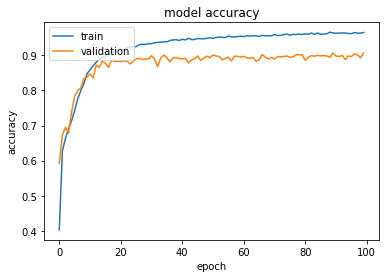

In [17]:
plt.plot(new_history.history['acc'])
plt.plot(new_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## I'm satisfied with that. Now let's try the dataset that WAS generated with chunking.

In [2]:
pentamer_fixed_labels = np.load('pentamer_fixed_labels.npy')
pentamer_fixed = np.load('pentamer_fixed_data.npy')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pentamer_fixed, pentamer_fixed_labels, \
                                                    test_size = 0.25, random_state=420)
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

## Now let's try it with those exact same models!

In [21]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=1024))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])
history = model.fit(X_train, y_binary_train,
          epochs=100,
          batch_size=128, validation_split=.1)
score = model.evaluate(X_test, y_binary_test, batch_size=128)

Train on 7325 samples, validate on 814 samples
Epoch 1/100
7325/7325 [==============================] - 1s 129us/step - loss: 1.9865 - acc: 0.2366 - val_loss: 1.7162 - val_acc: 0.3563
Epoch 2/100
7325/7325 [==============================] - 0s 54us/step - loss: 1.5144 - acc: 0.4392 - val_loss: 1.2296 - val_acc: 0.5934
Epoch 3/100
7325/7325 [==============================] - 0s 54us/step - loss: 1.1869 - acc: 0.5762 - val_loss: 1.1397 - val_acc: 0.5614
Epoch 4/100
7325/7325 [==============================] - 0s 53us/step - loss: 1.0838 - acc: 0.5990 - val_loss: 0.9487 - val_acc: 0.6474
Epoch 5/100
7325/7325 [==============================] - 0s 56us/step - loss: 0.9822 - acc: 0.6414 - val_loss: 0.9067 - val_acc: 0.6548
Epoch 6/100
7325/7325 [==============================] - 0s 52us/step - loss: 0.9184 - acc: 0.6562 - val_loss: 0.9604 - val_acc: 0.6327
Epoch 7/100
7325/7325 [==============================] - 0s 55us/step - loss: 0.8726 - acc: 0.6638 - val_loss: 0.9494 - val_acc: 0.6450


In [23]:
score

[0.2715913781019493, 0.9447106525680916]

### Dope.

## Wow. Why is there such a gap between the train/test curves in the non-chunked data, but here the test loss tracks almost perfectly with the train loss?

## Feel like I should know that. But I totally don't.

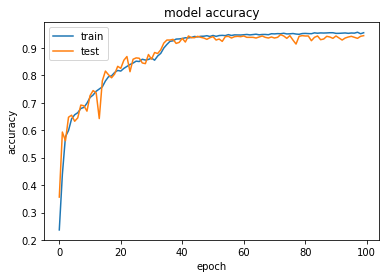

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
new_model = Sequential()
new_model.add(Dense(1024, activation='relu', input_dim=1024))
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(56, activation='tanh'))
new_model.add(Dropout(0.25))
new_model.add(Dense(10, activation='softmax'))



new_model.compile(loss='mse',
              optimizer=RMSprop,
              metrics=['accuracy'])
new_history = new_model.fit(X_train, y_binary_train,
          epochs=100,
          batch_size=128, validation_split=.1)
score = new_model.evaluate(X_test, y_binary_test, batch_size=128)

ValueError: Error when checking input: expected dense_75_input to have shape (1024,) but got array with shape (4096,)

In [26]:
print(score)

[0.009317771881788563, 0.9498709916760901]


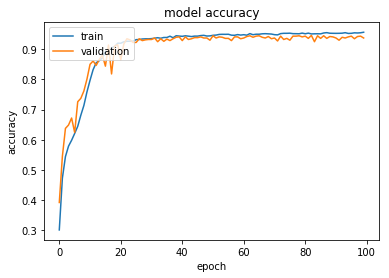

In [27]:
plt.plot(new_history.history['acc'])
plt.plot(new_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Now let's try the same with the sextamer data.

In [3]:
sextamer_fixed_labels = np.load('sextamer_fixed_labels.npy')
sextamer_fixed = np.load('sextamer_fixed_data.npy')
X_train, X_test, y_train, y_test = train_test_split(sextamer_fixed, sextamer_fixed_labels, \
                                                    test_size = 0.25, random_state=420)
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

## Use the second model, because it performed better.

In [74]:
#Yeah but you gotta modify the input dimension for new kmer values, though.

new_model = Sequential()
new_model.add(Dense(4096, activation='relu', input_dim=4096))
new_model.add(Dropout(0.5))
new_model.add(Dense(1024, activation='tanh'))
new_model.add(Dropout(0.3))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.25))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(56, activation='tanh'))
new_model.add(Dropout(0.25))
new_model.add(Dense(10, activation='softmax'))

new_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])
new_history = new_model.fit(X_train, y_binary_train,
          epochs=100,
          batch_size=128, callbacks=callbacks, validation_split=.1)
score = new_model.evaluate(X_test, y_binary_test, batch_size=128)

Train on 7325 samples, validate on 814 samples
Epoch 1/100
7325/7325 [==============================] - 2s 313us/step - loss: 1.7502 - acc: 0.3066 - val_loss: 1.4169 - val_acc: 0.3710
Epoch 2/100
7325/7325 [==============================] - 1s 156us/step - loss: 1.3757 - acc: 0.4531 - val_loss: 1.0495 - val_acc: 0.5971
Epoch 3/100
7325/7325 [==============================] - 1s 159us/step - loss: 1.0761 - acc: 0.5881 - val_loss: 0.9146 - val_acc: 0.6413
Epoch 4/100
7325/7325 [==============================] - 1s 158us/step - loss: 0.9763 - acc: 0.6257 - val_loss: 0.8100 - val_acc: 0.6966
Epoch 5/100
7325/7325 [==============================] - 1s 159us/step - loss: 0.9074 - acc: 0.6435 - val_loss: 0.8864 - val_acc: 0.6425
Epoch 6/100
7325/7325 [==============================] - 1s 169us/step - loss: 0.8264 - acc: 0.6632 - val_loss: 0.7121 - val_acc: 0.7088
Epoch 7/100
7325/7325 [==============================] - 1s 160us/step - loss: 0.7933 - acc: 0.6793 - val_loss: 0.7118 - val_acc: 0

In [36]:
print(score)

[0.2935248663339323, 0.9332841874003805]


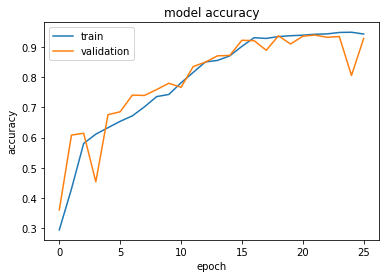

In [37]:
plt.plot(new_history.history['acc'])
plt.plot(new_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Okay... what about if we get jiggy wit it tho

In [38]:
from keras.layers import Embedding, Reshape, Merge, Dropout, Dense
from keras.layers import Input, Embedding, LSTM
from keras.models import Model

In [39]:
X_train.shape

(8139, 4096)

In [41]:
main_input = Input(shape=(8139,), dtype='int32', name='main_input')
x = Embedding(output_dim=512, input_dim=4096, input_length=8139)(main_input)
lstm_out = LSTM(32)(x)

auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Cool. So now we need to draw the same-indexed elements from the 5-mers and 6-mers, then get the corresponding labels.

In [4]:
import pandas as pd
pent_df = pd.DataFrame(pentamer_fixed)
sext_df = pd.DataFrame(sextamer_fixed)
print(pent_df.head())
print(sext_df.head())

       0         1         2         3         4         5         6     \
0  0.001001  0.001601  0.001601  0.000600  0.002202  0.001401  0.000600   
1  0.003002  0.001801  0.002802  0.002802  0.001801  0.002402  0.001001   
2  0.003002  0.001601  0.003002  0.001201  0.001001  0.001201  0.001201   
3  0.000600  0.000801  0.000400  0.000400  0.000600  0.002002  0.000801   
4  0.001201  0.001801  0.002602  0.001601  0.002402  0.001601  0.001201   

     7         8         9       ...       1014      1015      1016      1017  \
0  0.0006  0.001201  0.002402    ...     0.0006  0.000801  0.000801  0.001001   
1  0.0006  0.001201  0.005404    ...     0.0004  0.001001  0.001201  0.002002   
2  0.0006  0.001201  0.003603    ...     0.0004  0.000801  0.000200  0.001201   
3  0.0004  0.000400  0.000400    ...     0.0002  0.002202  0.000400  0.004203   
4  0.0004  0.000200  0.004604    ...     0.0000  0.000801  0.001001  0.002802   

       1018      1019    1020      1021      1022      1023  


In [5]:
"""pent_train=pent_df.sample(frac=0.8,random_state=420)
sext_train=sext_df.sample(frac=0.8,random_state=420)

pent_test = pent_df.drop(pent_train.index)
sext_test = sext_df.drop(sext_train.index)

full_labels = pd.Series(pentamer_fixed_labels)
y_train = full_labels.drop(pent_test.index)
y_test = full_labels.drop(y_train.index)

print(pent_train.head())
print(sext_train.head())"""

pent_train, pent_test, y_train, y_test = train_test_split(pentamer_fixed, pentamer_fixed_labels, \
                                                          test_size = 0.25, random_state = 420)
sext_train, sext_test, y_train, y_test = train_test_split(sextamer_fixed, sextamer_fixed_labels, \
                                                          test_size = 0.25, random_state = 420)

## Redeclare the model.

https://keras.io/getting-started/functional-api-guide/

In [43]:
print(pent_train.shape)
print(sext_train.shape)

(8139, 1024)
(8139, 4096)


In [76]:
main_input = Input(shape=(4096,), name='main_input')
x = Dense(2048, activation='relu')(main_input)
x = Dropout(.5)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.25)(x)

main_output = Dense(10, activation='sigmoid', name='main_output')(x)

model = Model(inputs=main_input, outputs=main_output)

RMSprop2 = keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)

model.compile(optimizer=RMSprop2, loss='mse',
              metrics=['accuracy'])

In [77]:
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)
history = model.fit(sext_train, y_binary_train,
          epochs=100, callbacks=callbacks, batch_size=128, validation_split=.1)
score = model.evaluate(sext_test, y_binary_test, batch_size=128)

Train on 7325 samples, validate on 814 samples
Epoch 1/100
7325/7325 [==============================] - 2s 284us/step - loss: 0.1678 - acc: 0.1706 - val_loss: 0.0887 - val_acc: 0.2494
Epoch 2/100
7325/7325 [==============================] - 1s 126us/step - loss: 0.1139 - acc: 0.1406 - val_loss: 0.0884 - val_acc: 0.2494
Epoch 3/100
7325/7325 [==============================] - 1s 125us/step - loss: 0.1047 - acc: 0.1423 - val_loss: 0.0885 - val_acc: 0.2494
Epoch 4/100
7325/7325 [==============================] - 1s 126us/step - loss: 0.0997 - acc: 0.1534 - val_loss: 0.0889 - val_acc: 0.2494
Epoch 5/100
7325/7325 [==============================] - 1s 126us/step - loss: 0.0959 - acc: 0.1803 - val_loss: 0.0822 - val_acc: 0.2494
Epoch 6/100
7325/7325 [==============================] - 1s 125us/step - loss: 0.0863 - acc: 0.2699 - val_loss: 0.0739 - val_acc: 0.4091
Epoch 7/100
7325/7325 [==============================] - 1s 128us/step - loss: 0.0763 - acc: 0.3630 - val_loss: 0.0628 - val_acc: 0

7325/7325 [==============================] - 1s 128us/step - loss: 0.0265 - acc: 0.7996 - val_loss: 0.0303 - val_acc: 0.7912
Epoch 61/100
7325/7325 [==============================] - 1s 130us/step - loss: 0.0253 - acc: 0.8119 - val_loss: 0.0269 - val_acc: 0.8194
Epoch 62/100
7325/7325 [==============================] - 1s 131us/step - loss: 0.0253 - acc: 0.8119 - val_loss: 0.0276 - val_acc: 0.8157
Epoch 63/100
7325/7325 [==============================] - 1s 129us/step - loss: 0.0244 - acc: 0.8231 - val_loss: 0.0281 - val_acc: 0.8071
Epoch 64/100
7325/7325 [==============================] - 1s 125us/step - loss: 0.0243 - acc: 0.8288 - val_loss: 0.0262 - val_acc: 0.8292
Epoch 65/100
7325/7325 [==============================] - 1s 122us/step - loss: 0.0235 - acc: 0.8334 - val_loss: 0.0248 - val_acc: 0.8440
Epoch 66/100
7325/7325 [==============================] - 1s 123us/step - loss: 0.0230 - acc: 0.8414 - val_loss: 0.0251 - val_acc: 0.8305
Epoch 67/100
7325/7325 [=======================

In [70]:
score

[0.012729286207617362, 0.928123848094652]

In [71]:
new_model.compile(loss='mse',
              optimizer=RMSprop2,
              metrics=['accuracy'])
new_history = new_model.fit(pent_train, y_binary_train,
          epochs=100,
          batch_size=128, callbacks=callbacks, validation_split=.1)
new_score = new_model.evaluate(pent_test, y_binary_test, batch_size=128)

Train on 7325 samples, validate on 814 samples
Epoch 1/100
7325/7325 [==============================] - 1s 187us/step - loss: 0.0074 - acc: 0.9604 - val_loss: 0.0106 - val_acc: 0.9423
Epoch 2/100
7325/7325 [==============================] - 0s 64us/step - loss: 0.0075 - acc: 0.9589 - val_loss: 0.0108 - val_acc: 0.9410
Epoch 3/100
7325/7325 [==============================] - 0s 64us/step - loss: 0.0075 - acc: 0.9599 - val_loss: 0.0109 - val_acc: 0.9410
Epoch 4/100
7325/7325 [==============================] - 0s 60us/step - loss: 0.0075 - acc: 0.9596 - val_loss: 0.0110 - val_acc: 0.9398
Epoch 5/100
2713/2713 [==============================] - 0s 18us/step


## Looks like you fucked up doing the train test split!

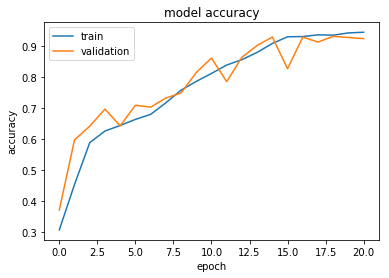

In [78]:
plt.plot(new_history.history['acc'])
plt.plot(new_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

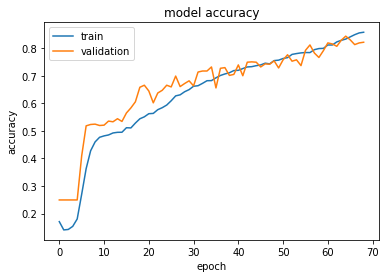

In [79]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Now let us begin to get truly "jiggy"

In [43]:
main_input = Input(shape=(4096,), name='main_input')
x = Dense(2048, activation='relu')(main_input)
x = Dropout(.5)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.25)(x)

#auxiliary_output_1 = Dense(10, activation='softmax', name='auxiliary_output_1')(x)

auxiliary_input = Input(shape=(1024,), name='auxiliary_input')
y = Dense(1024, activation='relu')(auxiliary_input)
y = Dropout(0.5)(y)
y = Dense(512, activation='sigmoid')(y)
y = Dropout(0.5)(y)
y = Dense(512, activation='relu')(y)
y = Dropout(.25)(y)
y = Dense(256, activation='relu')(y)
y = Dropout(.25)(y)
y = Dense(256, activation='relu')(y)
y = Dropout(.25)(y)
y = Dense(128, activation='relu')(y)
y = Dropout(.25)(y)
y = Dense(128, activation='relu')(y)
y = Dropout(.25)(y)
y = Dense(64, activation='relu')(y)
y = Dropout(.25)(y)

#auxiliary_output_2 = Dense(10, activation='softmax', name='auxiliary_output_2')(y)

#x = Lambda(lambda x: K.batch_dot(x[0], x[1]))([x, y])
x = keras.layers.concatenate([x, y])
#x = keras.layers.Dot([1,1])([x,y])

x = Dense(128, activation='sigmoid')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(0.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(20, activation='tanh')(x)
x = Dense(20, activation='tanh')(x)
x = Dense(20, activation='tanh')(x)
x = Dense(20, activation='tanh')(x)


main_output = Dense(10, activation='softmax', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=main_output) #auxiliary_output_1, auxiliary_output_2

Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9,
  beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [44]:
callbacks = [EarlyStopping('val_main_output_acc', patience=6)]

model.compile(optimizer=Adam, loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit([sext_train, pent_train], y_binary_train,
          epochs=200, batch_size=128, callbacks=callbacks, validation_split=.1)
score = model.evaluate([sext_test, pent_test], y_binary_test, batch_size=128)

Train on 7325 samples, validate on 814 samples
Epoch 1/200
7325/7325 [==============================] - 5s 645us/step - loss: 2.1865 - acc: 0.2108 - val_loss: 2.1361 - val_acc: 0.2494
Epoch 2/200
 640/7325 [=>............................] - ETA: 1s - loss: 2.1713 - acc: 0.2016

/home/jacob/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_main_output_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


7325/7325 [==============================] - 2s 234us/step - loss: 2.1513 - acc: 0.2374 - val_loss: 2.1340 - val_acc: 0.2494
Epoch 3/200
7325/7325 [==============================] - 2s 233us/step - loss: 2.1496 - acc: 0.2367 - val_loss: 2.1369 - val_acc: 0.2494
Epoch 4/200
7325/7325 [==============================] - 2s 234us/step - loss: 2.1503 - acc: 0.2386 - val_loss: 2.1356 - val_acc: 0.2494
Epoch 5/200
7325/7325 [==============================] - 2s 239us/step - loss: 2.1497 - acc: 0.2384 - val_loss: 2.1353 - val_acc: 0.2494
Epoch 6/200
7325/7325 [==============================] - 2s 239us/step - loss: 2.1479 - acc: 0.2385 - val_loss: 2.1351 - val_acc: 0.2494
Epoch 7/200
7325/7325 [==============================] - 2s 236us/step - loss: 2.1479 - acc: 0.2384 - val_loss: 2.1335 - val_acc: 0.2494
Epoch 8/200
7325/7325 [==============================] - 2s 241us/step - loss: 2.1488 - acc: 0.2385 - val_loss: 2.1369 - val_acc: 0.2494
Epoch 9/200
7325/7325 [==============================

7325/7325 [==============================] - 2s 244us/step - loss: 2.1474 - acc: 0.2386 - val_loss: 2.1355 - val_acc: 0.2494
Epoch 62/200
7325/7325 [==============================] - 2s 240us/step - loss: 2.1465 - acc: 0.2386 - val_loss: 2.1355 - val_acc: 0.2494
Epoch 63/200
7325/7325 [==============================] - 2s 244us/step - loss: 2.1470 - acc: 0.2386 - val_loss: 2.1365 - val_acc: 0.2494
Epoch 64/200
7325/7325 [==============================] - 2s 248us/step - loss: 2.1465 - acc: 0.2386 - val_loss: 2.1335 - val_acc: 0.2494
Epoch 65/200
7325/7325 [==============================] - 2s 239us/step - loss: 2.1466 - acc: 0.2386 - val_loss: 2.1353 - val_acc: 0.2494
Epoch 66/200
7325/7325 [==============================] - 2s 239us/step - loss: 2.1468 - acc: 0.2386 - val_loss: 2.1358 - val_acc: 0.2494
Epoch 67/200
7325/7325 [==============================] - 2s 247us/step - loss: 2.1466 - acc: 0.2386 - val_loss: 2.1356 - val_acc: 0.2494
Epoch 68/200
7325/7325 [=======================

7325/7325 [==============================] - 2s 219us/step - loss: 2.1461 - acc: 0.2386 - val_loss: 2.1341 - val_acc: 0.2494
Epoch 121/200
7325/7325 [==============================] - 2s 219us/step - loss: 2.1466 - acc: 0.2386 - val_loss: 2.1346 - val_acc: 0.2494
Epoch 122/200
7325/7325 [==============================] - 2s 217us/step - loss: 2.1465 - acc: 0.2386 - val_loss: 2.1351 - val_acc: 0.2494
Epoch 123/200
7325/7325 [==============================] - 2s 216us/step - loss: 2.1465 - acc: 0.2386 - val_loss: 2.1337 - val_acc: 0.2494
Epoch 124/200
7325/7325 [==============================] - 2s 218us/step - loss: 2.1463 - acc: 0.2386 - val_loss: 2.1349 - val_acc: 0.2494
Epoch 125/200
7325/7325 [==============================] - 2s 220us/step - loss: 2.1463 - acc: 0.2386 - val_loss: 2.1343 - val_acc: 0.2494
Epoch 126/200
7325/7325 [==============================] - 2s 217us/step - loss: 2.1467 - acc: 0.2386 - val_loss: 2.1346 - val_acc: 0.2494
Epoch 127/200
7325/7325 [================

7325/7325 [==============================] - 2s 223us/step - loss: 2.1464 - acc: 0.2386 - val_loss: 2.1363 - val_acc: 0.2494
Epoch 180/200
7325/7325 [==============================] - 2s 215us/step - loss: 2.1465 - acc: 0.2386 - val_loss: 2.1342 - val_acc: 0.2494
Epoch 181/200
7325/7325 [==============================] - 2s 221us/step - loss: 2.1461 - acc: 0.2386 - val_loss: 2.1344 - val_acc: 0.2494
Epoch 182/200
7325/7325 [==============================] - 2s 218us/step - loss: 2.1464 - acc: 0.2386 - val_loss: 2.1361 - val_acc: 0.2494
Epoch 183/200
7325/7325 [==============================] - 2s 218us/step - loss: 2.1461 - acc: 0.2386 - val_loss: 2.1340 - val_acc: 0.2494
Epoch 184/200
7325/7325 [==============================] - 2s 222us/step - loss: 2.1464 - acc: 0.2386 - val_loss: 2.1346 - val_acc: 0.2494
Epoch 185/200
7325/7325 [==============================] - 2s 223us/step - loss: 2.1464 - acc: 0.2386 - val_loss: 2.1346 - val_acc: 0.2494
Epoch 186/200
7325/7325 [================

In [38]:
score

[1.8775640079731701,
 0.8021467751873141,
 0.31094391474282657,
 0.7644733066405927,
 0.6402506449105684,
 0.9288610393957946,
 0.6892738664365544]

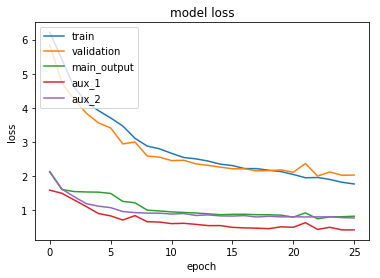

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_main_output_loss'])
plt.plot(history.history['val_auxiliary_output_1_loss'])
plt.plot(history.history['val_auxiliary_output_2_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'main_output', 'aux_1', 'aux_2'], loc='upper left')
plt.show()

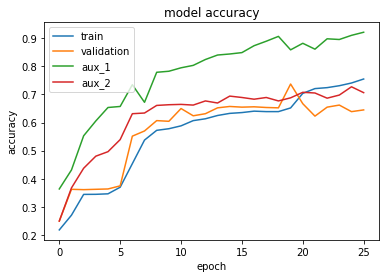

In [40]:
plt.plot(history.history['main_output_acc'])
plt.plot(history.history['val_main_output_acc'])
plt.plot(history.history['val_auxiliary_output_1_acc'])
plt.plot(history.history['val_auxiliary_output_2_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'aux_1', 'aux_2'], loc='upper left')
plt.show()

In [42]:
print(np.mean(history.history['val_auxiliary_output_1_acc']))
print(np.mean(history.history['val_auxiliary_output_2_acc']))

0.7724910219981661
0.6224721225763263
